# **Кодирование признаков**

✍ Как вы уже знаете, большинство моделей машинного обучения не умеют работать с текстовыми признаками.

Обратимся к нашим данным. Нас просят предсказать цену автомобиля. Для обучения модели выделим целевой столбец:

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import wget

data = pd.read_excel('data/data_ford_price.xlsx') 

In [2]:
y = data['price']
x = data.drop(columns='price')

Попробуем применить линейную регрессию на «сырых» данных:

In [3]:
lr = LinearRegression()
lr.fit(x,y)

ValueError: could not convert string to float: 'clean'

Мы получим ошибку с комментарием о том, что не удалось превратить строковое значение в число с плавающей точкой (float).

Чтобы этой ошибки не возникало, необходимо **закодировать** данные.

В разделе EDA-3 вы познакомились с такими методами кодирования, как:

* **порядковое кодирование**;  
    В порядковой кодировке признаков каждому строковому значению присваивается значение в виде целого числа, свойственного конкретному значению строки. Число столбцов в выборке остаётся неизменным.
* **двоичное кодирование**;  
    При двоичном кодировании значения признака переводятся в некоторый числовой порядок, затем полученные целые числа кодируются в двоичный код. Цифры двоичного представления формируют новые столбцы. Выборка увеличивается.
* **однократное кодирование**.  
    Однократное кодирование для каждой новой категории создаёт новый бинарный признак. Таким образом, число столбцов возрастает на число уникальных значений кодируемого признака.

![](https://lms.skillfactory.ru/assets/courseware/v1/8be15badcefe262082f2ba923930636a/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml6-3_2.png)

В таблице ниже представлено сравнение данных способов кодировки:

![](data/f1.png)

Для реализации данных методов мы использовали библиотеку [**category_encoders**](https://contrib.scikit-learn.org/category_encoders/). Однако вы уже знаете и такой мощный инструмент, как [**scikit-learn**](https://scikit-learn.org/). Данная библиотека содержит набор реализованных алгоритмов машинного обучения, метрик для оценки их качества, а также  класс preprocessing для предобработки данных, в частности — для кодирования категориальных признаков.

Представленная ниже таблица показывает соответствие типа кодирования классу в **sklearn.processing**.

![](data/f2.PNG)

*Преимущество использования одной библиотеки состоит в типичности методов. Например, вы знаете, что для обучения модели в sklearn используется метод **fit()**. При кодировании признаков здесь также применяют **fit()** для подгонки кодировщика под выборку и **transform()** — для преобразования данных в числа.*

![](https://lms.skillfactory.ru/assets/courseware/v1/d722e5d9f97aea89b2bf101e6ada29c6/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml6-3_4.png)

Из предыдущих модулей мы знаем, что при решении задач машинного обучения данные разбираются на обучающую (train) и валидационную (validation) выборки (последняя также может быть тестовой (test) выборкой). По аналогии подгонка кодировщика происходит на обучающей выборке, а трансформация — на обучающей и на тестовой.

Почему так? Потому что наша обученная модель не должна видеть данные, которые подаются в неё на тесте. Только так мы можем судить о том, что модель обучена качественно. То же самое и с кодировкой.

Давайте посмотрим на кодирование признака Образование способом «один-против-всех» (one vs all):

In [4]:
from sklearn.preprocessing  import LabelBinarizer
 
lb = LabelBinarizer()
 
education = ['нет', 'начальное', 'среднее', 'BSc', 'MSc', 'начальное', 'PhD']
 
lb.fit(education)
 
print('категории:', lb.classes_)
 
lb.transform(['нет', 'MSc'])

категории: ['BSc' 'MSc' 'PhD' 'начальное' 'нет' 'среднее']


array([[0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0]])

У класса **LabelBinarizer**, как и у двух остальных, есть атрибут **classes_**, который *выводит список уникальных значений признака*.

Вернёмся к нашей выборке. В ней присутствуют следующие категориальные признаки: condition, cylinders, title_status, transmission, drive, size.

При этом, признаки condition и cylinders — числовые, а title_status, transmission, drive, size — текстовые.

![](https://lms.skillfactory.ru/assets/courseware/v1/2e80fe726871bdcb77be326c16c81be5/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml6-3_6.png)

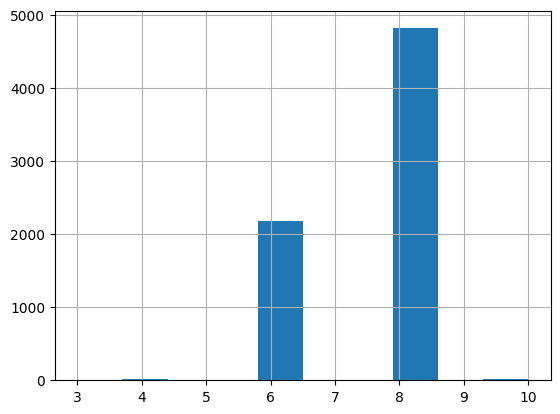

In [8]:
data['cylinders'].hist();

condition — это порядковый признак, который уже представлен в числовом формате, его кодировать не нужно. cylinders — номинальный признак, его нужно закодировать.

**Важно производить кодирование номинальных признаков, даже если они уже представлены в числовом формате, так как, в отличие от порядковых признаков, категории номинальных являются независимыми. В случае порядкового кодирования таких признаков мы вносим искусственные закономерности в данные (например, чем больше числовой код цилиндров, тем лучше, хотя это необязательно так).**
***

Посмотрим на число уникальных значений номинальных признаков title_status, transmission, drive, size и cylinders:

In [9]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']
 
for column in columns_to_change:
    print('Число уникальных значений признака {}: '.format(column), data[column].nunique())

Число уникальных значений признака cylinders:  6
Число уникальных значений признака title_status:  5
Число уникальных значений признака transmission:  3
Число уникальных значений признака drive:  3
Число уникальных значений признака size:  4


Итак, нам подходит однократное кодирование. Применим его к выбранным столбцам. Так как у нас нет отдельной тестовой выборки, то мы используем только один метод — **fit_transform()**. В качестве аргумента передаём таблицу с выбранными для преобразования признаками.

С помощью метода **get_feature_names()** получим список новых названий колонок:

In [10]:
from sklearn.preprocessing import OneHotEncoder
 
one_hot_encoder = OneHotEncoder()
 
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_onehot = one_hot_encoder.fit_transform(data[columns_to_change]).toarray()
 
# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names(columns_to_change)
print(column_names)

['cylinders_3' 'cylinders_4' 'cylinders_5' 'cylinders_6' 'cylinders_8'
 'cylinders_10' 'title_status_clean' 'title_status_lien'
 'title_status_missing' 'title_status_rebuilt' 'title_status_salvage'
 'transmission_automatic' 'transmission_manual' 'transmission_other'
 'drive_4wd' 'drive_fwd' 'drive_rwd' 'drive_nan' 'size_compact'
 'size_full-size' 'size_mid-size' 'size_sub-compact' 'size_nan']


c:\Users\Roman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Отлично, категориальные признаки закодированы. Теперь нам необходимо соединить преобразованные данные с исходными.

Напомним, что у библиотеки pandas есть дефолтный метод **get_dummies()** для получения однократного кодирования признаков. Однако OneHotEncoder способен принимать на вход как таблицы, так и numpy-массивы.

Какая форма (количество строк и столбцов) будет у нашего датасета о стоимости автомобилей после кодировки номинальных признаков однократным методом?

Для ответа на поставленный вопрос выполните следующие шаги:

1. Преобразуйте полученный массив закодированных данных в формат DataFrame, явно указав имена колонок.
2. Соедините новую таблицу с исходной.
3. Удалите закодированные столбцы columns_to_change из полученной таблицы.
4. Выведите на экран форму полученной таблицы.


In [26]:
# Преобразуйте полученный массив закодированных данных в формат DataFrame, явно указав имена колонок
data_onehot = pd.DataFrame(data_onehot, index=data.index, columns=column_names)

# Соедините новую таблицу с исходной.
data_new = pd.concat([data, data_onehot], axis=1)

# Удалите закодированные столбцы columns_to_change из полученной таблицы 
# (не отработает - потому что ХЗ вообще с чего они взяли, что там есть этот столбец)
data_new = data_new.drop(columns=columns_to_change)

# Выведите на экран форму полученной таблицы
data_new.shape

(7017, 30)